# Dance of the moons: Janus and Epimetheus

- Author : Efecan Turgut

## About the Projects

In this project we will be investigating trajectories of two moon around Saturn, which can be considered as a three body diagram. This is a very basic way to solve three body diagram.

## Introduction

Almost every person knows the Saturn and it's rings. This mysterious ring shape is nothing but the moons orbiting Saturn. Two of those moons, Epimetheus and Janus, orbit Saturn so close together that it seems as though their different orbital speeds should make them crash into each other. However, beauty of universe emerge among the complexity curtains and their mutual gravitational affection makes them dance around Saturn. Their slightly different distances from Saturn, keep them safe and they never get closer than 15,000 km from each other. 

When the two moons approach to each other every 4 year, their gravitational forces changes their orbits slightly which causes them to slow down or fasten up. Change in their velocity keeps the distance between those two moons which prevent them to crush each other. This procedure can be understand better in the following figure: 

We want to simulate the three-body-problem of Saturn, Janus and Epimetheus. Our reference frame is the restframe of Saturn. The motion between bodies is then governed by the gravitational law:
$$
m_i\ddot{\vec{x_i}} = \sum_j \vec{F_{ij}}
$$
with
$$
\vec{F_{ij}} = -G\frac{m_im_j}{|\vec{x_i}-\vec{x_j}|^3}(\vec{x_i}-\vec{x_j}).
$$
We assume that all movements take place in a two-dimensional plane and we work in dimensionless units with $G=1$, $m_{\text{J}}=1$, $m_{\text{E}}=4$ and $m_{\text{S}}=4.0\times 10^4$.

The initial conditions for the moons movements are: 
$$
\vec{x_{\text{J}}}(0)=(-155, 0);\, \frac{\text{d}\vec{x_{\text{J}}}(0)}{\text{d}t} = (0, -16.1)
$$
and
$$
\vec{x_{\text{E}}}(0)=(150, 0); \, \frac{\text{d}\vec{x_{\text{E}}}(0)}{\text{d}t} = (0, 16.3).
$$
Note that $\vec{x_S}(t)=0$ for all times!

## Tasks

In [2]:
# First, lets import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from matplotlib.animation import PillowWriter

1. Let's prepare the ODE-system governing the movements of the moons for `odeint`. 

In [3]:
# Constants
G = 1.0 # Gravity constant
mj = 1.0 # Mass of Janus
me = 4.0 # Mass of Epimetheus
ms = 4.0 * 10**4 # Mass of Saturn
Xs = 0 # Position of Saturn
Ys = 0 # Position of Saturn

# ODE
def dSdt(S,t):
    Xj, Vjx, Yj, Vjy, Xe, Vex, Ye, Vey = S
    r12 = np.sqrt((Xe-Xj)**2 + (Ye-Yj)**2) # Distance between Epimetheus and Janus
    r13 = np.sqrt((Xs-Xj)**2 + (Ys-Yj)**2) # Distance between Saturn and Janus
    r23 = np.sqrt((Xs-Xe)**2 + (Ys-Ye)**2) # Distance between Saturn and Epimetheus
    return [Vjx, # Velocity of the Janus on x-axis
            me/r12**3 * (Xe-Xj) + ms/r13**3 * (Xs-Xj), # The force that Janus applies to Epimetheus on x-axis, G=1
            Vjy, # Velocity of the Janus on y-axis
            me/r12**3 * (Ye-Yj) + ms/r13**3 * (Ys-Yj), # The force that Janus applies to Epimetheus on y-axis, G=1
            Vex, # Velocity of the Epimetheus on x-axis
            mj/r12**3 * (Xj-Xe) + ms/r23**3 * (Xs-Xe), # The force that Janus applies to Epimetheus G=1 
            Vey, # Velocity of the Epimetheus in y-axis
            mj/r12**3 * (Yj-Ye) + ms/r23**3 * (Ys-Ye)] # The force that Janus applies to Epimetheus G=1

2. Now, lets solve the system for $0\leq t \leq 2000$ and plot for both moons the distance to Saturn as a function of time. This should make clear how the moons avoid a collision on their orbits.

Text(0.5, 1.0, 'Epimetheus')

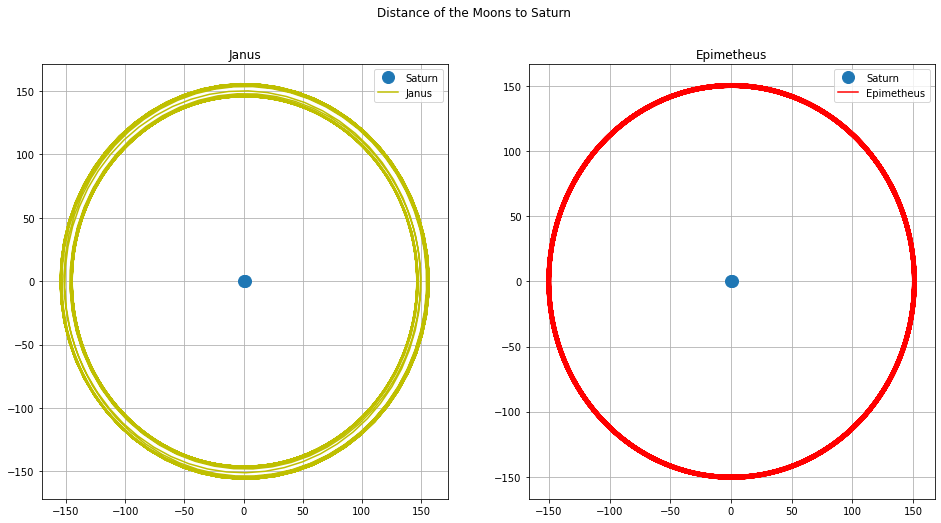

In [4]:
# To solve the Odeint lets define the initial conditions
# which are very important since the system depends on the initial conditions

Xj_0, Yj_0 = -155.0, 0 # Position of Janus when t=0
Xe_0, Ye_0 = 150.0, 0 # Position of Epimetheus when t=0
Vjx_0, Vjy_0 = 0, -16.1 # Velocity of Janus when t=0
Vex_0, Vey_0 = 0, 16.3 # Velocity of Epimetheus when t=0
S_0 = (Xj_0, Vjx_0, Yj_0, Vjy_0, Xe_0, Vex_0, Ye_0, Vey_0) # Initial Conditions

# Define time
t = np.linspace(0,2000,2000)

# Solve ODE
sol = odeint(dSdt, y0=S_0, t=t) # Solves ODE with Initial Conditions

# Append Solutions
x1 = sol.T[0] # x of Janus
y1 = sol.T[2] # y of Janus
x2 = sol.T[4] # x of Epimetheus
y2 = sol.T[6] # y of Epimetheus

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle('Distance of the Moons to Saturn')
axs[0].plot([0,0], 'o', label = 'Saturn', markersize=12) # Plots Saturn
axs[0].plot(x1,y1, color = 'y', label = 'Janus') # Plots Janus
axs[0].grid()
axs[0].legend()
axs[0].set_title('Janus')
axs[1].plot([0,0], 'o', label = 'Saturn',markersize=12) # Plots Saturn
axs[1].plot(x2,y2, color = 'r', label = 'Epimetheus') # Plots Epimetheus
axs[1].grid()
axs[1].legend()
axs[1].set_title('Epimetheus')

3. Lets create an animation of the moons movements with `matplotlib`. We can consider here the range $-200\leq x, y\leq 200$.

In [ ]:
def animate(i):
    ln1.set_data([x1[i], x2[i], Xs], [y1[i], y2[i], Ys]) # Defines which variables will be plotted

fig, ax = plt.subplots(1,1, figsize=(8,8)) # Defines figsize and subplots
ax.grid() # Grids on
ln1, = plt.plot([], [], 'o', markersize=8) # Plots
ax.set_ylim(-200, 200) # Defines axis limits
ax.set_xlim(-200,200) # Defines axis limits
ani = animation.FuncAnimation(fig, animate, frames=2000) # Creates 2000 frames from our data
ani.save('DM.mp4', writer = 'ffmpeg', fps = 30) # Saves as a mp4 using the type of ffmpeg with 30 fps